Let's import the packages needed to built the dashboard for this assignment

In [1]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
buildings = pd.read_csv("C:/Users/npali/Data_Viz/building_inventory.csv")

In [3]:
buildings.dtypes

Agency Name                object
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object

In [4]:
buildings.shape

(8862, 22)

Now we will check the unique values and nullvalues for - Agency Name and Congress Dist

In [5]:
buildings['Agency Name'].nunique(), buildings['Congress Dist'].nunique()

(35, 19)

In [6]:
buildings['Agency Name'].isnull().sum(), buildings['Congress Dist'].isnull().sum()

(0, 0)

Now we know that Agency Name is object type and histogram2d is indeed expecting numerical data. So we will convert the categorical data into numeric data by using cat.codes

In [7]:
buildings['Agency Name'] = buildings['Agency Name'].astype('category').cat.codes

Now let us cross check if the unique values remain the same

In [8]:
buildings['Agency Name'].nunique(), buildings['Congress Dist'].nunique() 

(35, 19)

In [9]:
buildings['Agency Name'] = buildings['Agency Name'].astype(str).astype(np.int64)

In [10]:
buildings.dtypes

Agency Name                 int64
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object

In [11]:
buildings.head() # The Agency name has been converted into codes which are numeric values

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,11,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,11,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,11,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,11,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,11,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


#### Now lets plot a normal histogram with the above parameters

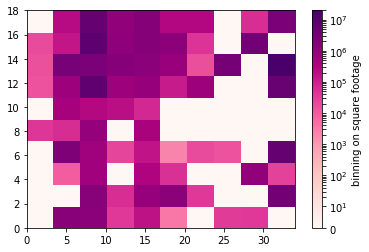

In [12]:
import matplotlib.colors as mpl_colors
plt.hist2d(buildings['Agency Name'], buildings['Congress Dist'], weights=buildings['Square Footage'], 
          bins=10, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))
cb = plt.colorbar()
cb.set_label('binning on square footage')

In [13]:
nAgency = 20 
nCongDist = 20

#(1)
hist2d, Agency_edges, CongDist_edges = np.histogram2d(buildings['Agency Name'], 
                                               buildings['Congress Dist'], 
                                               weights=buildings['Square Footage'], 
                                              bins=[nAgency, nCongDist])

# Let's take a quick look at this data
hist2d

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.5124000e+04, 1.6400000e+04, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.3330000e+04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.8700000e+04, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2194920e+06, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.3623200e+05, 2.0008320e+06, 0.0000000e+00,
        4.1984000e+04, 0.0000000e+00, 2.935000

In [14]:
hist2d.max(), hist2d.min() # a pretty big range for a histogram as discussed in class!

(14695427.0, 0.0)

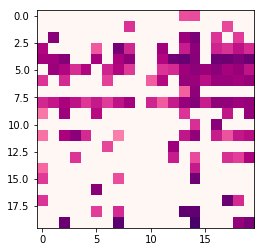

In [15]:
plt.imshow(hist2d, cmap='RdPu',norm=mpl_colors.SymLogNorm(10) )

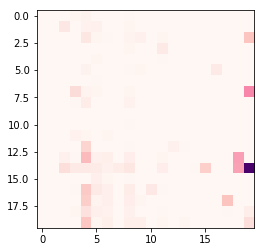

In [16]:
plt.imshow(hist2d.T, cmap='RdPu')

In [17]:
hist2d.shape, Agency_edges.shape, CongDist_edges.shape

((20, 20), (21,), (21,))

In [18]:
Agency_centers = (Agency_edges[:-1] + Agency_edges[1:]) / 2
Agency_centers

array([ 0.85,  2.55,  4.25,  5.95,  7.65,  9.35, 11.05, 12.75, 14.45,
       16.15, 17.85, 19.55, 21.25, 22.95, 24.65, 26.35, 28.05, 29.75,
       31.45, 33.15])

In [19]:
CongDist_centers = (CongDist_edges[:-1] + CongDist_edges[1:]) / 2
CongDist_centers

array([ 0.45,  1.35,  2.25,  3.15,  4.05,  4.95,  5.85,  6.75,  7.65,
        8.55,  9.45, 10.35, 11.25, 12.15, 13.05, 13.95, 14.85, 15.75,
       16.65, 17.55])

In [20]:
Agency_bins = np.linspace(0, 20, nAgency+1)
CongDist_bins = np.linspace(0, 20, nCongDist+1)
print(Agency_bins, Agency_bins.shape)
print(CongDist_bins, CongDist_bins.shape)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.] (21,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.] (21,)


In [21]:
hist2d, Agency_edges, CongDist_edges = np.histogram2d(buildings['Agency Name'], 
                                               buildings['Congress Dist'], 
                                               weights=buildings['Square Footage'],
                                              bins = [Agency_bins,CongDist_bins])

In [22]:
Agency_centers = (Agency_edges[:-1] + Agency_edges[1:]) / 2
CongDist_centers = (CongDist_edges[:-1] + CongDist_edges[1:]) / 2

In [23]:
hist2d = hist2d.T


In [24]:
hist2d.min(), hist2d.max(), hist2d[hist2d>0].min()


(0.0, 2908649.0, 2364.0)

In [25]:
np.log10(hist2d).min()


C:\Users\npali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

In [26]:
hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
# then take log


In [27]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Agency Name')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Congress Dist')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = CongDist_centers, 
                              column = Agency_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - label
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total Square Footage is = ' + str(v) # set our label
    
# make sure we check out     
heat_map.observe(get_data_value, 'selected')


# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel,fig])
myDashboard

### Let's Cross Check if the data is coming from the right selection

In [28]:
buildings[buildings['Square Footage'] == 15124] 

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
7188,0,Appellate Court Building - Mt. Vernon,14th & Main St,Mt Vernon,62864,Jefferson,12,Mike Bost,115,Bryant Terri,...,In Use,1857,1854,15124,4,3,1,Business,Business,Residential


#### Let's also include information about the TotalSquare Footage as a function of Year in a particular bin on another plot -- a line plot this time. Let's first start by making this plot alone before putting it into our dashboard.

In [29]:
buildings_lineplot = buildings.groupby(['Agency Name', 'Congress Dist', 'Year Acquired'])['Square Footage'].sum().reset_index(name='Total Square Footage')
buildings_lineplot.head(15)

,Agency Name,Congress Dist,Year Acquired,Total Square Footage
0,0,12,1857,15124
1,1,13,1967,16400
2,2,8,1967,43330
3,3,16,1858,15000
4,3,16,1860,3700
5,4,1,0,27500
6,4,1,1873,11000
7,4,1,1970,183964
8,4,1,1971,70995
9,4,1,1972,49841


In [30]:
buildings_lineplot.dtypes # Check the datatype of the columns

Agency Name             int64
Congress Dist           int64
Year Acquired           int64
Total Square Footage    int64
dtype: object

In [31]:
buildings_lineplot['Total Square Footage'].min(), buildings_lineplot['Total Square Footage'].max()

(0, 1367020)

In [32]:
i,j = 11,8 # picking an x/y bin for the sample mask region

Let's specify the range of Agency Name & Congress Dist for this selection of x/y bin:

In [33]:
Agency = [Agency_edges[j], Agency_edges[j+1]] # min/max Agency Name
CongDist = [CongDist_edges[i],CongDist_edges[i+1]] # min/max Congress Dist

Lets mask out some data with the above range as we did in class for latitude and longitude for the area

In [34]:
region_mask = ( (buildings_lineplot['Congress Dist'] >= CongDist[0]) & (buildings_lineplot['Congress Dist']<=CongDist[1]) &\
                (buildings_lineplot['Agency Name'] >= Agency[0]) & (buildings_lineplot['Agency Name']<=Agency[1]) )

# we can see this selects for the upper right point of our heatmap
CongDist, Agency, buildings_lineplot['Congress Dist'][region_mask]

([11.0, 12.0], [8.0, 9.0], 558    11
 559    12
 560    12
 561    12
 562    12
 563    12
 564    12
 565    12
 566    12
 567    12
 568    12
 569    12
 570    12
 571    12
 572    12
 573    12
 574    12
 575    12
 576    12
 577    12
 578    12
 579    12
 580    12
 581    12
 582    12
 583    12
 584    12
 585    12
 586    12
 587    12
 588    12
 589    12
 590    12
 591    12
 592    12
 593    12
 594    12
 595    12
 677    12
 678    12
 679    12
 680    12
 681    12
 Name: Congress Dist, dtype: int64)

In [35]:
#line graph
# Lets define the scale

x_sc=bqplot.OrdinalScale()
y_sc=bqplot.LinearScale()

# set up axis
xl_ax = bqplot.Axis(scale=x_sc, label='Year')
yl_ax = bqplot.Axis(scale=y_sc, label='Total Square Footage',label_offset="50px" ,orientation='vertical')

#Plot the graph with the masked region
line_plot =bqplot.Lines(x=buildings_lineplot['Year Acquired'][region_mask], y=buildings_lineplot['Total Square Footage'], scales={'x': x_sc, 'y': y_sc},
             stroke_width=3, colors=['purple'], display_legend=True, labels=['Line Plot'])

fig = bqplot.Figure(marks=[line_plot], axes=[x_ax, y_ax], legend_location='top-left')
fig

Figure(axes=[Axis(label='Agency Name', scale=LinearScale()), Axis(label='Congress Dist', orientation='vertical…

In [36]:
line_plot.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'close_path',
 'color',
 'colors',
 'curves_subset',
 'display_legend',
 'enable_hover',
 'fill',
 'fill_colors',
 'fill_opacities',
 'interactions',
 'interpolation',
 'labels',
 'labels_visibility',
 'line_style',
 'marker',
 'marker_size',
 'opacities',
 'preserve_domain',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke_width',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible',
 'x',
 'y']

### Let's put together our heatmap + label + line plot to create an interactive dashboard

In [37]:
# (I) CREATE LABEL
mySelectedLabel = ipywidgets.Label()

In [38]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Agency Name')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Congress Dist')

# (3) Marks for heat map
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = CongDist_centers, 
                              column = Agency_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

In [39]:
# Line Plot

x_sc=bqplot.OrdinalScale()
y_sc=bqplot.LinearScale()

# set up axis
xl_ax = bqplot.Axis(scale=x_sc, label='Year')
yl_ax = bqplot.Axis(scale=y_sc, label='Total Square Footage',label_offset="50px", orientation='vertical')

i,j = 16,0 # picking an x/y bin -- this is one I know has a lot of data!
Agency = [Agency_edges[j], Agency_edges[j+1]] # min/max Agency Name
CongDist = [CongDist_edges[i],CongDist_edges[i+1]] # min/max Congress Dist

line_plot =bqplot.Lines(x=buildings_lineplot['Year Acquired'][region_mask], y=buildings_lineplot['Total Square Footage'], scales={'x': x_sc, 'y': y_sc},
             stroke_width=3, colors=['purple'], display_legend=True, labels=['Line Plot'])

In [40]:
# this function does all the interactivity part
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total Square Footage = ' + str(v) # set our label
        # now: for the scatter plot
        Agency = [Agency_edges[j], Agency_edges[j+1]] # min/max Agency Name
        CongDist = [CongDist_edges[i],CongDist_edges[i+1]] # min/max Congress Dist
        region_mask = ( (buildings_lineplot['Congress Dist'] >= CongDist[0]) & (buildings_lineplot['Congress Dist']<=CongDist[1]) &\
                (buildings_lineplot['Agency Name'] >= Agency[0]) & (buildings_lineplot['Agency Name']<=Agency[1]) )
        line_plot.x = buildings_lineplot['Year Acquired'][region_mask]
        line_plot.y = buildings_lineplot['Total Square Footage'][region_mask]
        
heat_map.observe(get_data_value, 'selected')

In [41]:
# (5) create figures
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_dur = bqplot.Figure(marks = [line_plot], axes = [xl_ax, yl_ax])

In [42]:
fig_heatmap.layout.min_width='600px'
fig_dur.layout.min_width='500px'

myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.VBox([fig_heatmap,fig_dur])])
myDashboard

## Inferences and Takeaway

* I was not able to keep the X and Y ranges static on the graph as it kept on changing with the values i selected on the heatmap. As it is an interactive graph making the X and Y values might lead to a little clustred represnetation of data if we have a large scale of value or on the contrast we might not even see the data if it is very largely distributed or out of range. So I dont see any problem in dynamic ranges but I did not try to make them static.

* Also I was able to change the colour of my line plot and style to it. By using the lineplot.keys functionality I can maipulate by plot as per my needs

* Lastly I was still little lost when I was binning my data and masking it for thr interactive dashboard. I wanted to change the plot style like we did in our last assignment with a widget but was not very successful in doing so. 